In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, recall_score, f1_score, roc_curve, precision_score, accuracy_score, roc_auc_score

In [2]:
path = "result_file/"
data = pd.read_csv(path+"pca_plus_mda_projected_ref.csv")
data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,32,33,labels
0,0,-0.001923,-0.025004,-0.015690,0.094227,0.002820,-0.004624,0.010842,-0.394335,0.005285,...,-3.431556,1.545419,-0.772219,0.099290,0.295480,1.307416,-0.056070,-2.756669,1.315731,2.0
1,1,0.003668,-0.019180,-0.034687,0.083144,-0.005256,0.007582,0.011511,-0.417018,0.019941,...,-3.736461,2.511925,-0.923039,4.533489,-0.762992,-1.202834,-0.475500,-3.943887,-1.125824,2.0
2,2,0.002320,-0.009667,0.005322,0.077815,-0.000432,-0.014143,0.004369,0.257455,-0.008803,...,-0.778030,1.023543,-2.047554,1.331224,-3.491763,-1.187102,-3.449255,-0.934225,-0.399037,3.0
3,3,0.000119,-0.025087,-0.001967,-0.528368,-0.012153,0.053937,-0.030431,-0.128392,-0.374418,...,-0.670909,1.724749,0.916354,4.426478,-4.156235,0.829589,0.158212,-2.545338,-1.011252,5.0
4,4,-0.009881,-0.020543,-0.010572,0.082419,0.000470,-0.004358,0.001871,-0.273569,0.015811,...,0.990845,3.070675,-1.787558,3.505641,-3.084866,-2.027411,-0.592256,-3.063422,1.643193,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6850,6850,0.001376,0.001507,0.002547,0.029158,-0.008738,-0.019816,0.003964,0.204509,0.007115,...,-1.281039,2.460330,0.550565,2.342060,-4.341905,-1.063848,-1.216682,-0.702598,0.235929,3.0
6851,6851,-0.001893,-0.006201,0.009586,0.032324,0.007978,0.036584,0.013876,0.246597,-0.032781,...,-1.483721,0.436373,0.910272,2.614645,-0.072674,0.787630,-0.909701,-2.556338,0.357563,3.0
6852,6852,-0.001824,-0.012076,-0.002373,0.082165,0.009380,-0.020962,0.006382,0.196894,-0.026452,...,-1.619744,4.568594,-0.016431,5.265356,-1.098578,-1.847780,0.622461,-2.800955,-0.317241,3.0
6853,6853,-0.004474,-0.010438,-0.025827,0.135893,0.005073,-0.004421,0.004752,-0.293780,0.032417,...,-4.351263,3.419848,-0.418702,2.762144,0.208635,0.634443,0.030294,-1.769098,-1.289506,2.0


In [3]:
data = data.drop(['Unnamed: 0', 'labels'], axis=1)
data

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,-0.001923,-0.025004,-0.015690,0.094227,0.002820,-0.004624,0.010842,-0.394335,0.005285,-0.004266,...,1.988970,-3.431556,1.545419,-0.772219,0.099290,0.295480,1.307416,-0.056070,-2.756669,1.315731
1,0.003668,-0.019180,-0.034687,0.083144,-0.005256,0.007582,0.011511,-0.417018,0.019941,-0.027600,...,1.305117,-3.736461,2.511925,-0.923039,4.533489,-0.762992,-1.202834,-0.475500,-3.943887,-1.125824
2,0.002320,-0.009667,0.005322,0.077815,-0.000432,-0.014143,0.004369,0.257455,-0.008803,-0.039687,...,-1.914105,-0.778030,1.023543,-2.047554,1.331224,-3.491763,-1.187102,-3.449255,-0.934225,-0.399037
3,0.000119,-0.025087,-0.001967,-0.528368,-0.012153,0.053937,-0.030431,-0.128392,-0.374418,-0.040054,...,0.030090,-0.670909,1.724749,0.916354,4.426478,-4.156235,0.829589,0.158212,-2.545338,-1.011252
4,-0.009881,-0.020543,-0.010572,0.082419,0.000470,-0.004358,0.001871,-0.273569,0.015811,-0.050608,...,-0.133607,0.990845,3.070675,-1.787558,3.505641,-3.084866,-2.027411,-0.592256,-3.063422,1.643193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6850,0.001376,0.001507,0.002547,0.029158,-0.008738,-0.019816,0.003964,0.204509,0.007115,0.002282,...,-0.120228,-1.281039,2.460330,0.550565,2.342060,-4.341905,-1.063848,-1.216682,-0.702598,0.235929
6851,-0.001893,-0.006201,0.009586,0.032324,0.007978,0.036584,0.013876,0.246597,-0.032781,0.003337,...,2.178211,-1.483721,0.436373,0.910272,2.614645,-0.072674,0.787630,-0.909701,-2.556338,0.357563
6852,-0.001824,-0.012076,-0.002373,0.082165,0.009380,-0.020962,0.006382,0.196894,-0.026452,-0.061936,...,-0.429730,-1.619744,4.568594,-0.016431,5.265356,-1.098578,-1.847780,0.622461,-2.800955,-0.317241
6853,-0.004474,-0.010438,-0.025827,0.135893,0.005073,-0.004421,0.004752,-0.293780,0.032417,-0.024768,...,-0.441596,-4.351263,3.419848,-0.418702,2.762144,0.208635,0.634443,0.030294,-1.769098,-1.289506


In [4]:
train_labels = pd.read_csv("train_label.csv")
train_labels

,Unnamed: 0,x
0,8171,alpha
1,7315,alpha
2,6592,beta
3,7535,ductal
4,4201,alpha
...,...,...
6850,2953,beta
6851,7489,beta
6852,8064,beta
6853,1772,alpha


In [5]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
train_labels["x"] = ord_enc.fit_transform(train_labels[["x"]])
train_labels

,Unnamed: 0,x
0,8171,2.0
1,7315,2.0
2,6592,3.0
3,7535,5.0
4,4201,2.0
...,...,...
6850,2953,3.0
6851,7489,3.0
6852,8064,3.0
6853,1772,2.0


In [6]:
querydata = pd.read_csv(path+"pca_plus_mda_projected_query.csv")
querydata

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,32,33
0,0,-0.002279,-0.007546,0.007126,0.048498,-0.003704,0.028121,0.002361,-0.008235,0.048270,...,-0.358109,-3.936857,4.482619,-0.598844,4.517730,-1.895436,-0.451174,-0.363477,-1.828556,-1.330586
1,1,-0.002262,-0.012609,-0.004587,0.096040,0.000824,-0.006874,0.007518,0.180413,-0.010146,...,0.009692,-0.004778,1.051474,-0.491702,4.192053,-2.274561,-2.184806,-0.879461,-1.629036,1.520254
2,2,-0.011831,0.005270,-0.003916,0.068531,0.001023,-0.023515,0.014321,-0.365488,0.005484,...,0.740425,-3.743700,2.085769,-0.486111,3.754100,-3.770054,-1.090145,-1.333535,-1.420206,0.993668
3,3,-0.004480,0.003783,0.000651,0.054710,0.012231,0.019709,0.010214,0.046974,0.043062,...,-0.216836,-3.442822,2.487467,-2.126244,4.637063,-2.871203,-2.615224,-1.941790,-1.197467,-0.967039
4,4,0.012988,-0.028110,-0.013707,0.139082,0.022805,-0.002346,0.022711,-0.418287,0.038830,...,0.440150,-4.103694,3.326307,-3.426917,5.696960,-4.413627,-1.946807,-2.539952,-1.443313,0.456292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1709,1709,-0.009320,0.001413,-0.021748,0.004968,0.002166,0.030701,-0.023896,0.111370,0.036080,...,-0.298703,-1.519915,0.524489,-2.175824,4.317910,-4.601253,-3.200753,-2.670453,-1.129909,0.424132
1710,1710,-0.010129,-0.016456,0.031422,-0.513993,-0.017866,0.084860,-0.021472,-0.071512,0.527784,...,-1.281708,-1.961884,1.282118,1.018981,3.869744,-2.122152,0.107332,-0.852009,-2.083095,-0.484846
1711,1711,-0.015074,-0.053914,-0.033749,-0.582308,0.012372,0.105530,-0.032795,-0.193629,-0.595482,...,-0.878834,-3.863903,3.039328,0.540810,2.749858,-2.187914,-2.620240,-2.207310,-3.256386,-1.783704
1712,1712,-0.004278,-0.031516,-0.022387,0.140345,0.010036,0.018000,0.022048,-0.439609,0.019480,...,-0.577597,-2.370942,2.188792,0.888590,4.454958,-2.596394,-1.485108,0.393149,-1.496136,-0.558062


In [7]:
querydata = querydata.drop('Unnamed: 0', axis=1)
querydata

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,-0.002279,-0.007546,0.007126,0.048498,-0.003704,0.028121,0.002361,-0.008235,0.048270,0.024728,...,-0.358109,-3.936857,4.482619,-0.598844,4.517730,-1.895436,-0.451174,-0.363477,-1.828556,-1.330586
1,-0.002262,-0.012609,-0.004587,0.096040,0.000824,-0.006874,0.007518,0.180413,-0.010146,-0.013277,...,0.009692,-0.004778,1.051474,-0.491702,4.192053,-2.274561,-2.184806,-0.879461,-1.629036,1.520254
2,-0.011831,0.005270,-0.003916,0.068531,0.001023,-0.023515,0.014321,-0.365488,0.005484,0.002357,...,0.740425,-3.743700,2.085769,-0.486111,3.754100,-3.770054,-1.090145,-1.333535,-1.420206,0.993668
3,-0.004480,0.003783,0.000651,0.054710,0.012231,0.019709,0.010214,0.046974,0.043062,-0.006082,...,-0.216836,-3.442822,2.487467,-2.126244,4.637063,-2.871203,-2.615224,-1.941790,-1.197467,-0.967039
4,0.012988,-0.028110,-0.013707,0.139082,0.022805,-0.002346,0.022711,-0.418287,0.038830,-0.027737,...,0.440150,-4.103694,3.326307,-3.426917,5.696960,-4.413627,-1.946807,-2.539952,-1.443313,0.456292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1709,-0.009320,0.001413,-0.021748,0.004968,0.002166,0.030701,-0.023896,0.111370,0.036080,0.083887,...,-0.298703,-1.519915,0.524489,-2.175824,4.317910,-4.601253,-3.200753,-2.670453,-1.129909,0.424132
1710,-0.010129,-0.016456,0.031422,-0.513993,-0.017866,0.084860,-0.021472,-0.071512,0.527784,0.039649,...,-1.281708,-1.961884,1.282118,1.018981,3.869744,-2.122152,0.107332,-0.852009,-2.083095,-0.484846
1711,-0.015074,-0.053914,-0.033749,-0.582308,0.012372,0.105530,-0.032795,-0.193629,-0.595482,0.005176,...,-0.878834,-3.863903,3.039328,0.540810,2.749858,-2.187914,-2.620240,-2.207310,-3.256386,-1.783704
1712,-0.004278,-0.031516,-0.022387,0.140345,0.010036,0.018000,0.022048,-0.439609,0.019480,-0.016848,...,-0.577597,-2.370942,2.188792,0.888590,4.454958,-2.596394,-1.485108,0.393149,-1.496136,-0.558062


In [8]:
y_test = pd.read_csv('test_label.csv')
y_test

,Unnamed: 0,x
0,1449,beta
1,3838,beta
2,3587,alpha
3,810,delta
4,4875,alpha
...,...,...
1709,3345,delta
1710,6417,acinar
1711,4974,ductal
1712,5108,alpha


In [9]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
y_test["x"] = ord_enc.fit_transform(y_test[["x"]])
y_test

,Unnamed: 0,x
0,1449,3.0
1,3838,3.0
2,3587,2.0
3,810,4.0
4,4875,2.0
...,...,...
1709,3345,4.0
1710,6417,0.0
1711,4974,5.0
1712,5108,2.0


In [10]:
data.shape

(6855, 34)

In [11]:
train_labels.x.nunique()

14

2023-07-18 11:58:30.163261: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-18 11:58:30.287857: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-18 11:58:30.287884: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-07-18 11:58:30.949811: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

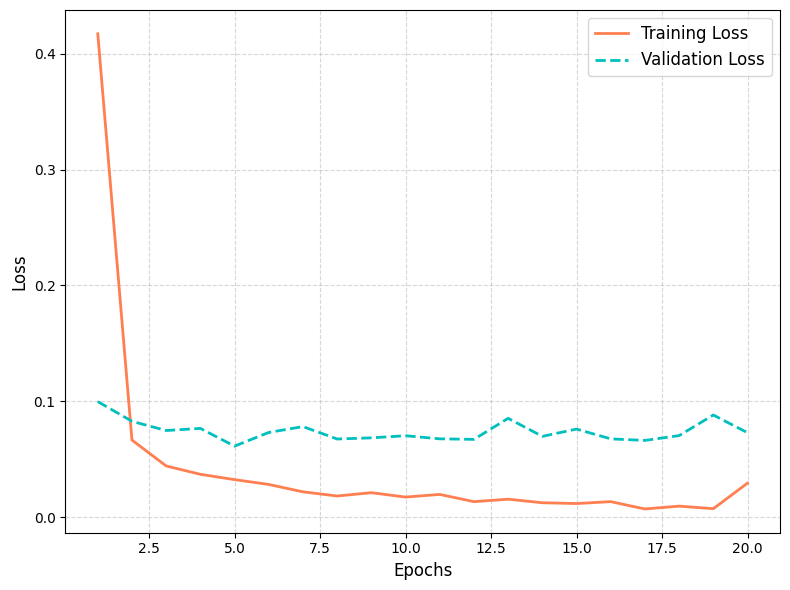

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import random

np.random.seed(40)
random.seed(40)
# Assuming you have defined 'data' and 'train_labels' arrays
input_shape = data.shape[1]
# Determine the number of unique classes
num_classes = len(np.unique(train_labels.x))

# Create the model
model = Sequential()
# Add the first hidden layer
model.add(Dense(100, activation='relu', input_shape=(input_shape,)))

model.add(Dense(55, activation='relu'))

# Add the second hidden layer
model.add(Dense(30, activation='relu'))

#model.add(Dense(15, activation='relu'))
#model.add(Dense(30, activation='relu'))
model.add(Dense(55, activation='relu'))
model.add(Dense(100, activation='relu'))
# Add the output layer
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# One-hot encode the target labels
one_hot_labels = to_categorical(train_labels.x)

# Train the model and store the training history
history = model.fit(data, one_hot_labels, epochs=20, validation_split=0.2, verbose=0, shuffle=False)

# Access the training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot the training and validation loss curves with custom styling
epochs = range(1, len(training_loss) + 1)
plt.figure(figsize=(8, 6))

# # Plot the shadow
# plt.fill_between(epochs, training_loss, color='blue', alpha=0.1)
# plt.fill_between(epochs, validation_loss, color='red', alpha=0.1)

# Plot the main lines
plt.plot(epochs, training_loss, 'coral', label='Training Loss', linewidth=2, linestyle='-')
plt.plot(epochs, validation_loss, 'c', label='Validation Loss', linewidth=2, linestyle='--')

#plt.title('Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)

plt.legend(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

#plt.savefig('network8.png', dpi=300)
plt.show()





In [13]:
# Convert predictions to labels
import time
start_time = time.time()
predictions = model.predict(querydata)
predicted_labels = np.argmax(predictions, axis=1)
end_time = time.time()
total_time = end_time - start_time
print(total_time)

54/54 [==============================] - 0s 976us/step
0.2049713134765625


In [30]:

predicted_labels

array([3, 3, 2, ..., 5, 2, 4])

In [31]:
acc = accuracy_score(y_test.x, predicted_labels)
print('accuracy', acc)
f_score = f1_score(y_test.x, predicted_labels, average='macro')
print('F1 score',f_score)
print('recall')
r_score = recall_score(y_test.x, predicted_labels, average='macro')
print(r_score)
#calculating precision
pres = precision_score(y_test.x, predicted_labels, average='macro')
print('precision', pres)

accuracy 0.9877479579929989
F1 score 0.9806204270650003
recall
0.9737505941801422
precision 0.9901684825437785
